In [3]:
'''Importing Data Manipulation Modules'''
import numpy as np                 # Linear Algebra
import pandas as pd                # Data Processing, CSV file I/O (e.g. pd.read_csv)

'''Seaborn and Matplotlib Visualization'''
import matplotlib                  # 2D Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns              # Python Data Visualization Library based on matplotlib
import geopandas as gpd            # Python Geospatial Data Library
plt.style.use('fivethirtyeight')
%matplotlib inline

'''Plotly Visualizations'''
import plotly as plotly                # Interactive Graphing Library for Python
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)


'''Machine Learning'''
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

In [5]:
airbnb= pd.read_csv('/Users/shilp/Downloads/new-york-city-airbnb-open-data_final/AB_NYC_2019.csv')

airbnb.drop(['name','id','host_name','last_review'],axis=1,inplace=True)
airbnb['reviews_per_month']=airbnb['reviews_per_month'].replace(np.nan, 0)

In [6]:
'''Encode labels with value between 0 and n_classes-1.'''
le = preprocessing.LabelEncoder()                                            # Fit label encoder
le.fit(airbnb['neighbourhood_group'])
airbnb['neighbourhood_group']=le.transform(airbnb['neighbourhood_group'])    # Transform labels to normalized encoding.

le = preprocessing.LabelEncoder()
le.fit(airbnb['neighbourhood'])
airbnb['neighbourhood']=le.transform(airbnb['neighbourhood'])

le = preprocessing.LabelEncoder()
le.fit(airbnb['room_type'])
airbnb['room_type']=le.transform(airbnb['room_type'])

airbnb.sort_values(by='price',ascending=True,inplace=True)

airbnb.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
25796,86327101,1,13,40.68258,-73.91284,1,0,1,95,4.35,6,222
25634,15787004,1,28,40.69467,-73.92433,1,0,2,16,0.71,5,0
25433,131697576,0,62,40.83296,-73.88668,1,0,2,55,2.56,4,127
25753,1641537,1,91,40.72462,-73.94072,1,0,2,12,0.53,2,0
23161,8993084,1,13,40.69023,-73.95428,1,0,4,1,0.05,4,28


In [7]:
'''Reversing Labeling Transform'''
list(le.inverse_transform(airbnb['room_type']))[:10]

['Private room',
 'Private room',
 'Private room',
 'Private room',
 'Private room',
 'Private room',
 'Shared room',
 'Entire home/apt',
 'Private room',
 'Shared room']

In [8]:
'''Train LRM'''
lm = LinearRegression()

X = airbnb[['host_id','neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = airbnb['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
'''Get Predictions & Print Metrics'''
predicts = lm.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts)),
        r2_score(y_test,predicts) * 100,
        mean_absolute_error(y_test,predicts)
        ))


        Mean Squared Error: 180.7340965693626
        R2 Score: 11.63957678232357
        Mean Absolute Error: 72.86091366825617
     


In [13]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lm, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
lm_rmse_scores = np.sqrt(-scores)
print("""
        Scores: {}
        Mean: {}
        Standard deviation: {}
        """.format(
        lm_rmse_scores,
        lm_rmse_scores.mean(),
        lm_rmse_scores.std())
     )


        Scores: [237.22555275 282.19382235 186.82124459 234.60652944 247.47577519]
        Mean: 237.66458486316475
        Standard deviation: 30.57352498208825
        


In [10]:
'''Gradient Boosted Regressor'''
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)
GBoost.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
'''Get Predictions & Metrics'''
predicts2 = GBoost.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts2)),
        r2_score(y_test,predicts2) * 100,
        mean_absolute_error(y_test,predicts2)
        ))


        Mean Squared Error: 175.7063604164762
        R2 Score: 16.48729170563582
        Mean Absolute Error: 63.96413086074086
     


In [16]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(GBoost, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
GBoost_rmse_scores = np.sqrt(-scores)
print("""
        Scores: {}
        Mean: {}
        Standard deviation: {}
        """.format(
        GBoost_rmse_scores,
        GBoost_rmse_scores.mean(),
        GBoost_rmse_scores.std())
     )


        Scores: [216.37307139 273.7406517  222.71921234 214.26902076 243.45950716]
        Mean: 234.11229267073676
        Standard deviation: 22.342850975898525
        


In [17]:
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts.flatten()}).head(20)

error_airbnb.head(5)

,Actual Values,Predicted Values
0,400,135.112125
1,140,210.599057
2,195,176.222978
3,120,100.439183
4,88,88.545753


In [18]:
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_airbnb.index, y=error_airbnb['Predicted Values']),
    go.Bar(name='Actual', x=error_airbnb.index, y=error_airbnb['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()

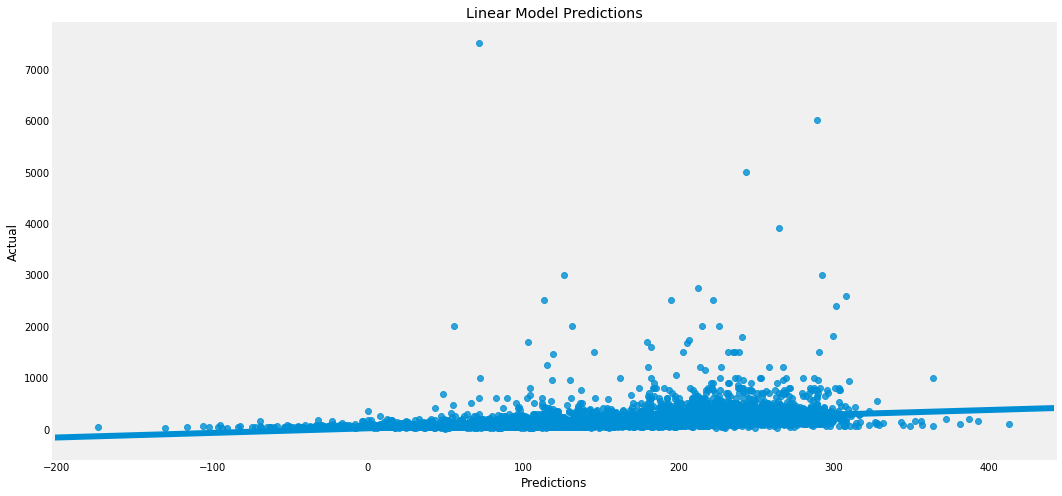

In [19]:
plt.figure(figsize=(16,8))
sns.regplot(predicts,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Linear Model Predictions")
plt.grid(False)
plt.show()

In [20]:
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts2.flatten()}).head(20)

error_airbnb.head(5)

,Actual Values,Predicted Values
0,400,125.903567
1,140,156.575618
2,195,161.337522
3,120,94.543442
4,88,71.978409


In [21]:
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_airbnb.index, y=error_airbnb['Predicted Values']),
    go.Bar(name='Actual', x=error_airbnb.index, y=error_airbnb['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()

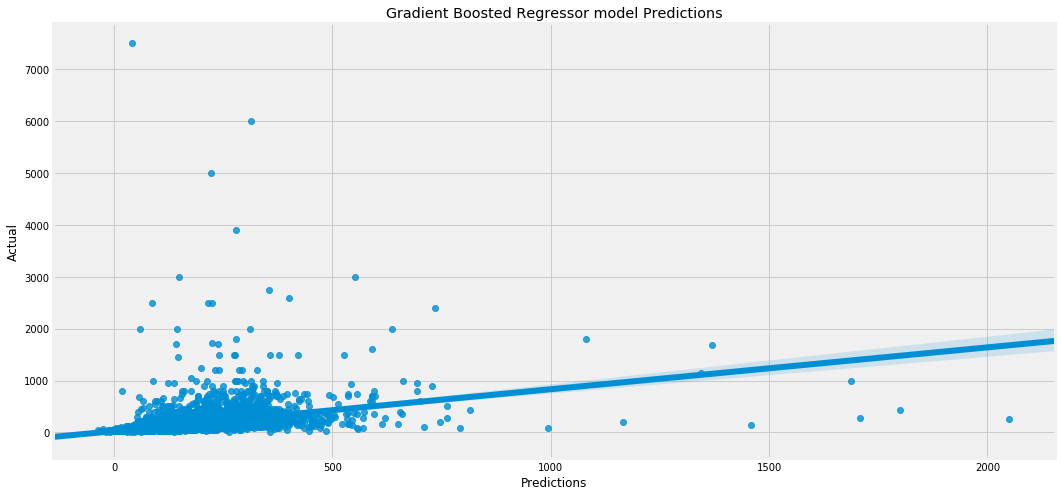

In [22]:
plt.figure(figsize=(16,8))
sns.regplot(predicts2,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Gradient Boosted Regressor model Predictions")
plt.show()

In [30]:
df= pd.read_csv('/Users/shilp/Downloads/new-york-city-airbnb-open-data_final/AB_NYC_2019.csv')

In [31]:
df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [32]:
drop_elements = ['last_review', 'host_name','id']
df.drop(drop_elements, axis = 1, inplace= True)
df.fillna({'reviews_per_month':0}, inplace=True)
df.reviews_per_month.isnull().sum()

0

In [33]:
df_onehot = pd.get_dummies(df[['price']], prefix = "", prefix_sep = "")
df_onehot['neighbourhood'] = df['neighbourhood']
fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_grouped = df_onehot.groupby('neighbourhood').mean().reset_index()
df_grouped.head(20)

,neighbourhood,price
0,Allerton,87.595238
1,Arden Heights,67.250000
2,Arrochar,115.000000
3,Arverne,171.779221
4,Astoria,117.187778
5,Bath Beach,81.764706
6,Battery Park City,367.557143
7,Bay Ridge,144.432624
8,Bay Terrace,142.000000
9,"Bay Terrace, Staten Island",102.500000


In [34]:
# Import libraries
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [35]:
df_clustering = df_grouped.drop('neighbourhood',1)
df_clustering.head()

,price
0,87.595238
1,67.250000
2,115.000000
3,171.779221
4,117.187778


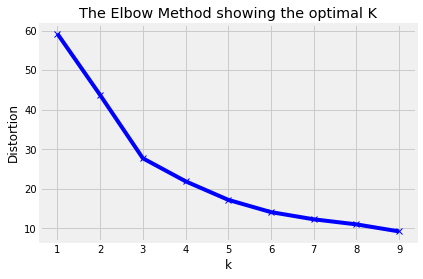

In [36]:
K = range(1,10)
distortions = []
for k in K:
    kmeans = KMeans(init = 'k-means++', n_clusters = k, n_init = 12, random_state = 0)
    kmeans.fit(df_clustering.values.reshape(-1,1))
    distortions.append(sum(np.min(cdist(df_clustering.values.reshape(-1, 1),kmeans.cluster_centers_, 'euclidean'), axis = 1)) / df_clustering.shape [0])

import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal K')
plt.show()  

In [37]:
num_clusters = 3

kmeans = KMeans(n_clusters = num_clusters, random_state = 0).fit(df_clustering)
kmeans.labels_

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 2,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2,
       0], dtype=int32)

In [38]:
df_grouped.insert(0, 'Cluster', kmeans.labels_)

In [39]:
df_grouped.head()

,Cluster,neighbourhood,price
0,0,Allerton,87.595238
1,0,Arden Heights,67.250000
2,0,Arrochar,115.000000
3,1,Arverne,171.779221
4,0,Astoria,117.187778


In [40]:
df_co = df.copy()
df_co.drop_duplicates(subset = ['neighbourhood'])
drop_element = 'price'
df_co.drop(drop_element, axis = 1)
df_co.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [41]:
df_merge = pd.merge(df_co, df_grouped[['Cluster','neighbourhood','price']],on = 'neighbourhood')
df_merge.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price_x,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Cluster,price_y
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,0,92.885714
1,Large and Cozy Private Bedroom,308652,Brooklyn,Kensington,40.64106,-73.97426,Private room,39,1,45,0.46,2,365,0,92.885714
2,SUPER BIG AND COZY PRIVATE BEDROOM,308652,Brooklyn,Kensington,40.64302,-73.97255,Private room,39,1,82,0.94,2,365,0,92.885714
3,Private clean pleasant spacious room.,164675,Brooklyn,Kensington,40.64277,-73.97296,Private room,60,2,20,0.42,1,347,0,92.885714
4,Kensington/Ditmas Park pied-a-terre,1471384,Brooklyn,Kensington,40.64330,-73.97386,Entire home/apt,90,30,3,0.05,1,286,0,92.885714


In [42]:
cluster_1 = df_merge.loc[df_merge['Cluster'] == 1]

cluster_0 = df_merge.loc[df_merge['Cluster'] == 0]

cluster_2 = df_merge.loc[df_merge['Cluster'] == 2]


In [43]:
print('Cluster_0 mean price: ',cluster_0.price_x.mean())
print('Reviews in Cluster0:',len(cluster_0.number_of_reviews))
print('Cluster_1 mean price: ',cluster_1.price_x.mean())
print('Reviews in Cluster1:',len(cluster_1.number_of_reviews))
print('Cluster_2 mean price: ',cluster_2.price_x.mean())
print('Reviews in Cluster2:',len(cluster_2.number_of_reviews))

Cluster_0 mean price:  111.33186416908745
Reviews in Cluster0: 29949
Cluster_1 mean price:  215.24358495598827
Reviews in Cluster1: 18745
Cluster_2 mean price:  488.85074626865674
Reviews in Cluster2: 201


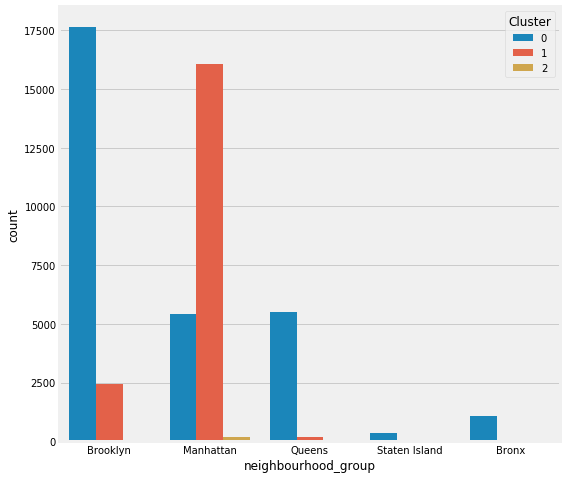

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8))
sns.countplot(x = 'neighbourhood_group', hue = 'Cluster', data = df_merge)

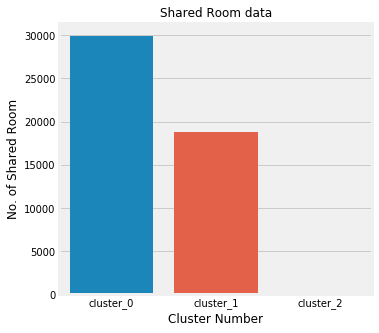

In [45]:
df_clu=pd.DataFrame(np.arange(3).reshape((1,3)),index=['0'],columns=['cluster_0','cluster_1','cluster_2'])
df_clu.cluster_0 = len(cluster_0)
df_clu.cluster_1 = len(cluster_1)
df_clu.cluster_2 = len(cluster_2)

plt.figure(figsize = (5,5))
sns.barplot(data = df_clu)
plt.xlabel('Cluster Number',fontsize =12)
plt.ylabel('No. of Shared Room', fontsize = 12)
plt.title('Shared Room data',fontsize = 12 )
plt.show()

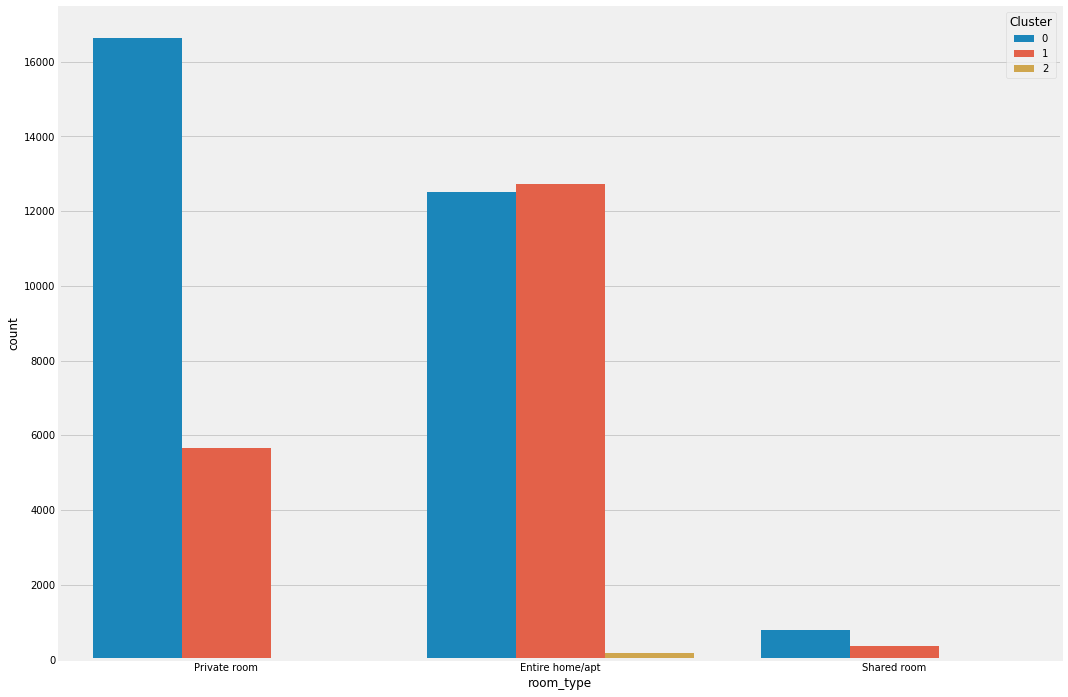

In [46]:
plt.figure(figsize = (16,12))
sns.countplot(x = 'room_type', hue = 'Cluster', data = df_merge)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

scores = cross_val_score(kmeans, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
kmeans_rmse_scores = np.sqrt(-scores)
print("""
        Scores: {}
        Mean: {}
        Standard deviation: {}
        """.format(
        kmeans_rmse_scores,
        kmeans_rmse_scores.mean(),
        kmeans_rmse_scores.std())
     )


        Scores: [306.01241504 276.63503804 311.97084279 343.60885911 222.11666675
 275.93087199 260.57659253 319.78902052 310.29865028 290.91500787]
        Mean: 291.7853964913496
        Standard deviation: 32.75950752610324
        
